### Ch12 Figure4

In [1]:
# Maybe the data suggests that most of your customers run with partners. 

who_do_you_run_with = ['Yourself', 'Partner', 'Neighbor', 'Friends', 'Kids']

data = []

for i in range(1000):
    ary = [0 for k in range(len(who_do_you_run_with))]
    how_many = rd.randint(1, len(who_do_you_run_with))
    ary[:how_many] = [1 for j in range(how_many)]
    rd.shuffle(ary)
    ary.append(i)
    data.append(ary)
    
df = pd.DataFrame(data, columns=['Yourself', 'Partner', 'Neighbor', 'Friends', 'Kids', 'id'])
# df.to_csv('csv_output/ch12_fig4.csv', index=False)
df = pd.read_csv('csv_output/ch12_fig4.csv')
df.head()

,Yourself,Partner,Neighbor,Friends,Kids,id
0,0,1,0,0,0,0
1,0,1,0,0,0,1
2,1,1,1,1,1,2
3,0,1,1,0,0,3
4,1,1,0,1,1,4


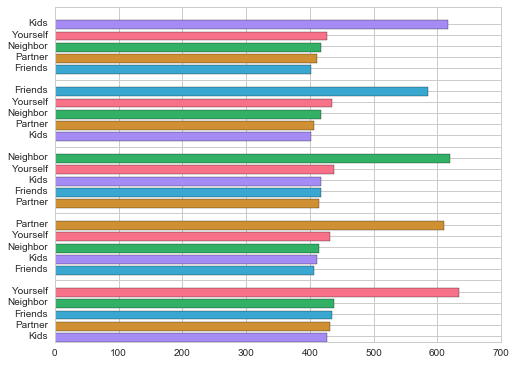

In [2]:
df = pd.read_csv('csv_output/ch12_fig4.csv')
types = ['Yourself', 'Partner', 'Neighbor', 'Friends', 'Kids']
cm = sns.color_palette("husl", 8)
cm_types = {'Yourself':0, 'Partner':1, 'Neighbor':3, 'Friends':5, 'Kids':6}

%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(1, figsize=(8,6))

labels = []
i = 0
for j in range(5):
    d = df[df[types[j]] == 1].iloc[:,:-1].sum().sort_values()
    ax.barh(width=d, bottom=np.arange(5)+(5*j)+i, color=[cm[cm_types[k]] for k in d.index]);
    labels.extend(d.index)
    labels.append('')
    i += 1

ax.set_yticks(np.arange(len(labels)-1)+.5)
ax.set_yticklabels(labels);

f.savefig('svg_output/ch12_fig4.svg', format='svg')

Say we send out surveys each quarter, and people can select multiple who they run with. The first bar is the tally for each type and below is the people within those group that also run with other type of people. For example, people that run on their own sometimes also run with their neighbor and people that run with their kids most likely will otherwise run on their own.